[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[25.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]]


C:\Users\JaFsi\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


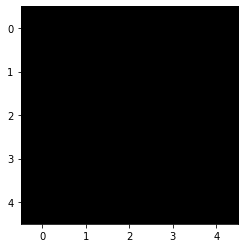

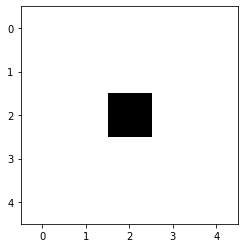

In [5]:
import numpy as np
import matplotlib.pyplot as plt


M = np.ones((5,5))
#M = np.eye(5)*255
#M[1:3,1:3]=0
#M = 1-M

FM = np.fft.fft2(M)

print(M)
print(FM)
fshift = np.fft.fftshift(FM)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.imshow(M, cmap='gray')
plt.show()

plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

(Text(0.5, 1.0, 'Image after Inverse'), ([], []), ([], []))

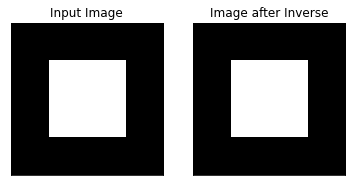

In [24]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(M, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after Inverse'), plt.xticks([]), plt.yticks([])


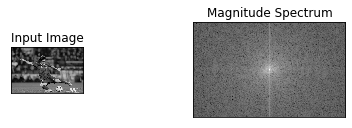

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


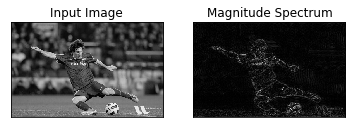

In [12]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 0, remaining all 1
mask = np.ones((rows,cols,2))
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# apply mask and inverse DFT
fshift = dft_shift*mask

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

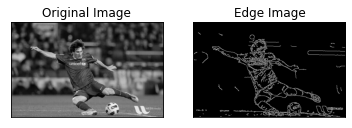

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()